- Word2Vec is a popular technique in natural language processing (NLP) for word embedding, which involves mapping words or phrases to continuous vector spaces. This representation captures semantic meanings, relationships, and similarities between words, making it easier for machine learning models to understand language.

### Key Concepts of Word2Vec

### Word Embeddings:
Word2Vec transforms words into dense vectors, where semantically similar words are represented by similar vectors. For example, the words "king" and "queen" will have vectors that are close together in the embedding space.
Training Methods:

### Continuous Bag of Words (CBOW): 
Predicts a target word from its surrounding context words. Given a set of context words, CBOW tries to find the most probable word that fits that context.
Skip-gram: Predicts the context words given a target word. It focuses on the relationships between words by attempting to maximize the probability of context words given a specific word.

### High-Dimensional Space:
Word vectors are typically represented in a high-dimensional space (e.g., 100 to 300 dimensions). The higher the dimensions, the more information the vectors can potentially capture, but it also increases computational complexity.

### Similarity and Analogy:
Word2Vec allows for measuring the similarity between words using cosine similarity. It also enables performing analogies, such as "king - man + woman = queen."

### Advantages of Word2Vec
Efficiency: It can efficiently process large datasets and learn high-quality word embeddings.
Capturing Semantic Relationships: Word2Vec captures semantic relationships between words better than traditional one-hot encoding.

### Transfer Learning: 
Pre-trained Word2Vec embeddings can be fine-tuned for specific tasks, saving time and computational resources.

### Limitations of Word2Vec
- Static Representations:
Word2Vec generates static embeddings, meaning that each word has a single vector representation regardless of context. This can lead to issues with polysemy (words with multiple meanings).

- Out-of-Vocabulary (OOV) Words:
Words that were not in the training dataset will not have embeddings, limiting the model's ability to generalize.

In [1]:
import gensim
from gensim.models import Word2Vec

# Sample sentences for training
sentences = [
    ["I", "love", "natural", "language", "processing"],
    ["Word2Vec", "is", "a", "great", "tool"],
    ["Machine", "learning", "is", "fun"],
]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

# Get the vector for a word
vector = model.wv['language']
print("Vector for 'language':", vector)

# Find similar words
similar_words = model.wv.most_similar('language', topn=5)
print("Words similar to 'language':", similar_words)


Vector for 'language': [-0.00515624 -0.00666834 -0.00777684  0.00831073 -0.00198234 -0.00685496
 -0.00415439  0.00514413 -0.00286914 -0.00374966  0.00162143 -0.00277629
 -0.00158436  0.00107449 -0.00297794  0.00851928  0.00391094 -0.00995886
  0.0062596  -0.00675425  0.00076943  0.00440423 -0.00510337 -0.00211067
  0.00809548 -0.00424379 -0.00763626  0.00925791 -0.0021555  -0.00471943
  0.0085708   0.00428334  0.00432484  0.00928451 -0.00845308  0.00525532
  0.00203935  0.00418828  0.0016979   0.00446413  0.00448629  0.00610452
 -0.0032021  -0.00457573 -0.00042652  0.00253373 -0.00326317  0.00605772
  0.00415413  0.00776459  0.00256927  0.00811668 -0.00138721  0.00807793
  0.00371702 -0.00804732 -0.00393361 -0.00247188  0.00489304 -0.00087216
 -0.00283091  0.00783371  0.0093229  -0.00161493 -0.00515925 -0.00470176
 -0.00484605 -0.00960283  0.00137202 -0.00422492  0.00252671  0.00561448
 -0.00406591 -0.00959658  0.0015467  -0.00670012  0.00249517 -0.00378063
  0.00707842  0.00064022  0.

# Summary
Word2Vec is a foundational technique in NLP that facilitates the understanding of word semantics through vector representations. Despite its limitations, it has paved the way for more advanced embedding techniques, such as GloVe and contextual embeddings like BERT and ELMo.

# CBOW & SKIPGRAM

CBOW (Continuous Bag of Words) and Skip-gram are two architectures used in Word2Vec for generating word embeddings. Both approaches aim to learn vector representations of words based on their context, but they do so in different ways.

# 1. Continuous Bag of Words (CBOW)
How It Works: CBOW predicts a target word given a context of surrounding words. For instance, in the sentence "The cat sits on the mat," if you take the context words "The," "cat," "on," "the," and "mat," CBOW would predict the target word "sits."

- Mechanism:
Input: A context (surrounding words).
Output: The predicted target word.
The model averages the vectors of the context words to generate a prediction for the target word.
Example: Given the context words ("The," "cat," "on," "the," "mat"), CBOW would try to predict the word "sits."

- Strengths:
Works well with smaller datasets.
Tends to capture the global context of the sentence.

# 2. Skip-gram
How It Works: Skip-gram does the opposite of CBOW; it uses a target word to predict its surrounding context words. For example, given the target word "sits," it would try to predict the context words around it.

- Mechanism:
Input: A target word.
Output: The predicted context words.
The model generates predictions for multiple context words based on the input target word.
Example: Given the target word "sits," Skip-gram might predict the context words ("The," "cat," "on," "the," "mat").

- Strengths:
More effective for larger datasets.
Captures more information about the relationships between words, making it useful for understanding semantics.

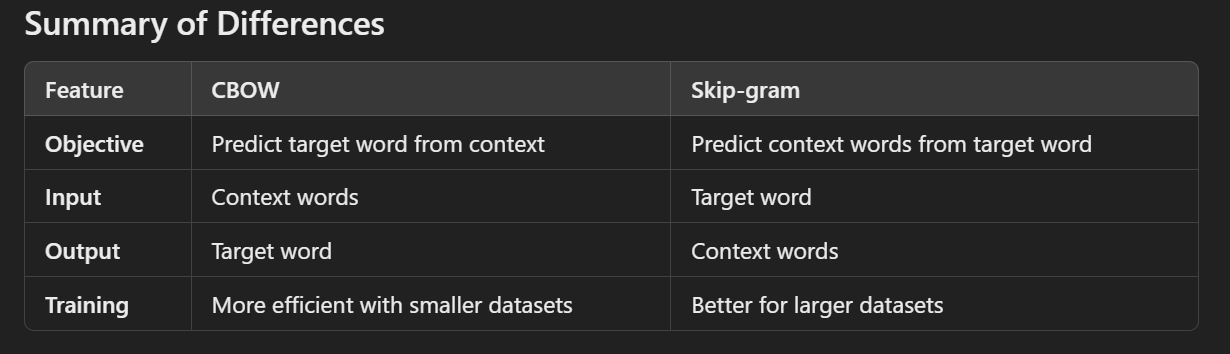

Conclusion
Both CBOW and Skip-gram are effective methods for learning word embeddings, and the choice between them often depends on the size of the training dataset and the specific application. CBOW tends to be faster and is suitable for smaller datasets, while Skip-gram excels in capturing relationships in larger datasets.

In [2]:
import gensim
from gensim.models import Word2Vec

# Sample sentences for training
sentences = [
    ["I", "love", "natural", "language", "processing"],
    ["Word2Vec", "is", "a", "great", "tool"],
    ["Machine", "learning", "is", "fun"],
    ["Natural", "language", "processing", "is", "awesome"]
]

# CBOW Model
cbow_model = Word2Vec(sentences, vector_size=100, window=2, min_count=1, sg=0)

# Skip-gram Model
skipgram_model = Word2Vec(sentences, vector_size=100, window=2, min_count=1, sg=1)

# Example: Getting the vector for a word
word = "language"
cbow_vector = cbow_model.wv[word]
skipgram_vector = skipgram_model.wv[word]

print(f"CBOW Vector for '{word}':", cbow_vector)
print(f"Skip-gram Vector for '{word}':", skipgram_vector)

# Example: Finding similar words
cbow_similar_words = cbow_model.wv.most_similar(word, topn=5)
skipgram_similar_words = skipgram_model.wv.most_similar(word, topn=5)

print(f"CBOW - Words similar to '{word}':", cbow_similar_words)
print(f"Skip-gram - Words similar to '{word}':", skipgram_similar_words)


CBOW Vector for 'language': [ 9.4794443e-05  3.0776660e-03 -6.8129268e-03 -1.3756783e-03
  7.6698321e-03  7.3483307e-03 -3.6729362e-03  2.6408839e-03
 -8.3165076e-03  6.2072724e-03 -4.6391813e-03 -3.1636052e-03
  9.3106655e-03  8.7376230e-04  7.4904198e-03 -6.0752141e-03
  5.1592872e-03  9.9243205e-03 -8.4574828e-03 -5.1340456e-03
 -7.0650815e-03 -4.8629697e-03 -3.7796097e-03 -8.5361497e-03
  7.9556443e-03 -4.8439130e-03  8.4241610e-03  5.2615325e-03
 -6.5502375e-03  3.9581223e-03  5.4700365e-03 -7.4268035e-03
 -7.4072029e-03 -2.4764745e-03 -8.6256117e-03 -1.5829162e-03
 -4.0474746e-04  3.3000517e-03  1.4428297e-03 -8.8208629e-04
 -5.5940356e-03  1.7293066e-03 -8.9629035e-04  6.7937491e-03
  3.9739395e-03  4.5298305e-03  1.4351519e-03 -2.7006667e-03
 -4.3665408e-03 -1.0332628e-03  1.4375091e-03 -2.6469158e-03
 -7.0722066e-03 -7.8058685e-03 -9.1226082e-03 -5.9341355e-03
 -1.8468037e-03 -4.3235817e-03 -6.4619821e-03 -3.7178723e-03
  4.2904112e-03 -3.7397402e-03  8.3768284e-03  1.5343785e

- Explanation of the Code
Training Data: A small sample dataset is created with sentences to train the models.

# CBOW Model:
sg=0 specifies that the CBOW architecture should be used.

The model is trained with specified parameters:
vector_size: The dimensionality of the word vectors.
window: The maximum distance between the current and predicted word within a sentence.
min_count: Ignores all words with a total frequency lower than this.

# Skip-gram Model:
sg=1 specifies that the Skip-gram architecture should be used.
The same parameters are applied for consistency.
Word Vectors: The vectors for the word "language" are retrieved from both models.

- Finding Similar Words: The models are used to find words similar to "language" based on the trained embeddings.

- Output
When you run this code, you will see the vectors for the word "language" as well as lists of words similar to "language" from both the CBOW and Skip-gram models. The actual output will vary depending on the training data and random initialization but should provide a useful illustration of how both models work.